In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy.stats import entropy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)

def load_data(path):
    series = []
    chnum = 0
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullname = os.path.join(dirname, filename)
            timestamp = datetime.datetime.strptime(filename, '%Y.%m.%d.%H.%M.%S')
            content = pd.read_csv(fullname, sep='\t', header=None)
            chnum=len(content.columns)
            
            #features extraction
            mean_abs = content.abs().mean()
            max_abs = content.abs().max()
            rms = calculate_rms(content)
            entropy = calculate_entropy(content)
            kurtosis = np.array(content.kurtosis())
            shape = rms / mean_abs
            impulse = max_abs / mean_abs
            crest = max_abs/rms
            #print(kurtosis.tolist())
            series.append([timestamp] + mean_abs.tolist() + rms + kurtosis.tolist() + shape.tolist() + impulse.tolist() + crest.tolist() + entropy.tolist())
            #break
            
    ch_prefix=['ch{}','RMS_ch{}','KUR_ch{}','SHP_ch{}','IMP_ch{}','CRS_ch{}','ENT_ch{}']
    cols =['timestamp']
    for c in ch_prefix:
        cols+=[c.format(x+1) for x in range(chnum)]

    
    df = pd.DataFrame(series, columns=cols)
    df.set_index('timestamp',inplace = True)      
    df.sort_index(inplace = True)
    return df

def get_datanofail(df, thresholdmin, thresholdmax):
    res = df[df.index<=thresholdmax]
    return res[res.index>=thresholdmin]
    
def get_datawithfail(df, threshold):
    return df[df.index>threshold]

def calctimeleft(df):
    failure_datetime = df.index.max()
    return (failure_datetime - df.index)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = load_data('/Users/mariaelenagarciabaiz/Downloads/Capstone/1st_test')
print(df.head)

<bound method NDFrame.head of                           ch1       ch2       ch3       ch4       ch5  \
timestamp                                                               
2003-10-22 12:06:24  0.104144  0.100250  0.107151  0.102002  0.106148   
2003-10-22 12:09:13  0.103652  0.099853  0.108190  0.102922  0.106660   
2003-10-22 12:14:13  0.105036  0.101540  0.108548  0.104041  0.108741   
2003-10-22 12:19:13  0.104898  0.101570  0.108150  0.103379  0.108073   
2003-10-22 12:24:13  0.104776  0.102188  0.107943  0.102626  0.108453   
...                       ...       ...       ...       ...       ...   
2003-11-25 16:07:32  0.138781  0.130003  0.151368  0.138563  0.209854   
2003-11-25 23:13:21  0.142146  0.131044  0.162769  0.149215  0.339316   
2003-11-25 23:19:56  0.142098  0.131344  0.167268  0.154293  0.357835   
2003-11-25 23:29:56  0.141899  0.132984  0.158428  0.153233  0.331161   
2003-11-25 23:39:56  0.142011  0.131697  0.170624  0.162340  0.438412   

                    

<Axes: xlabel='timestamp'>

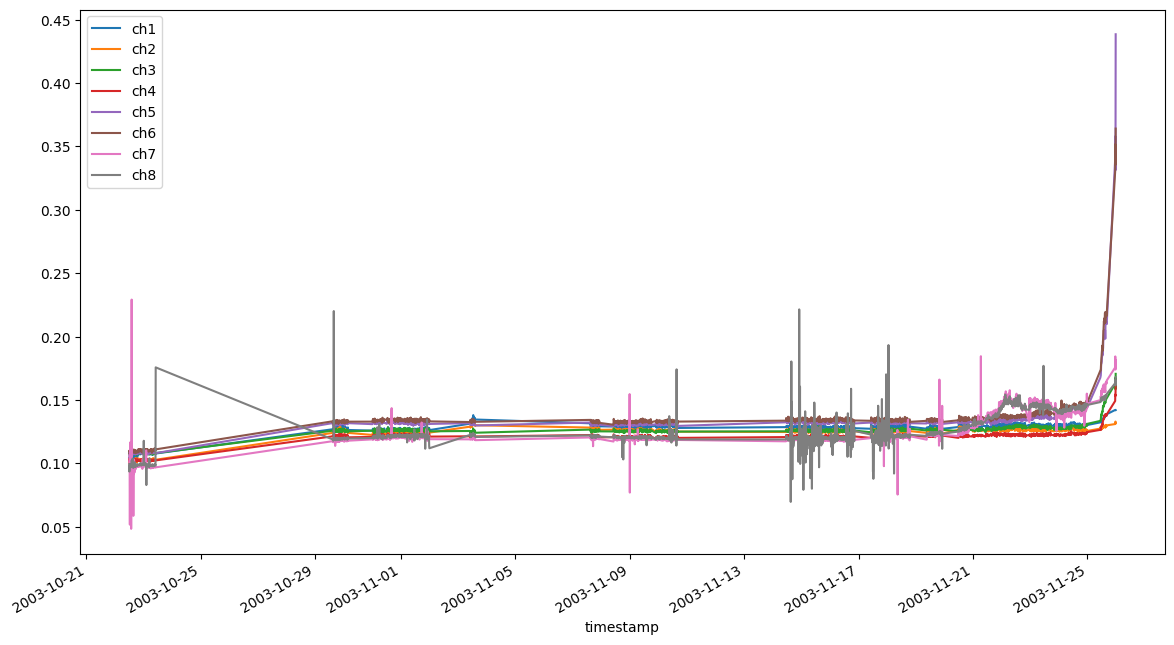

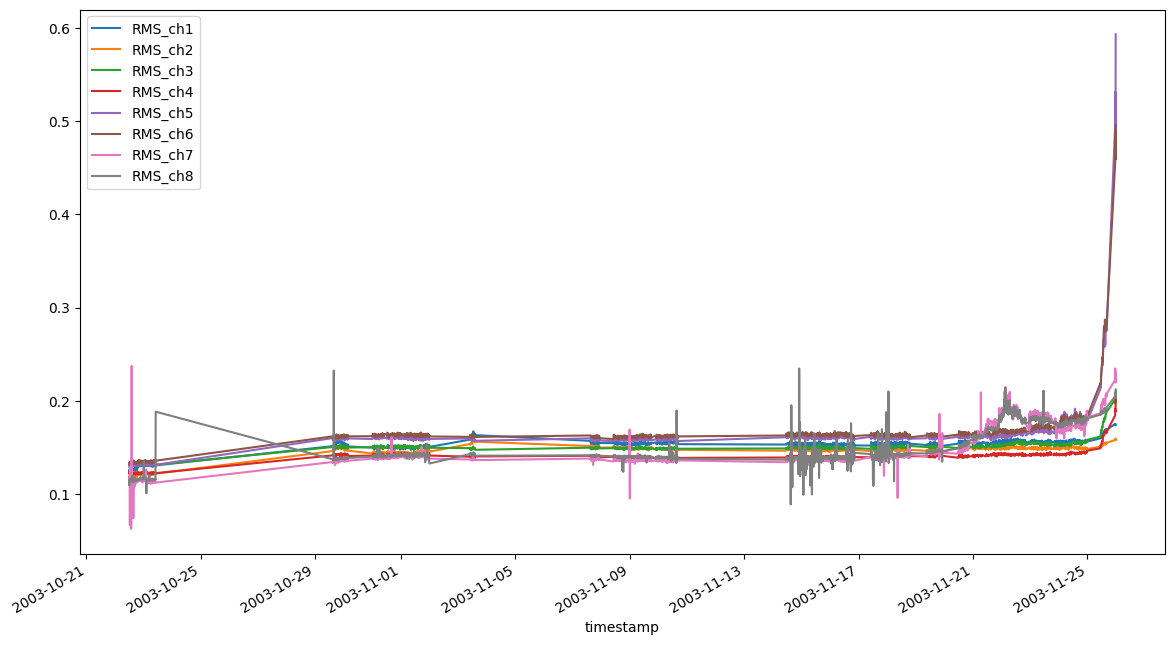

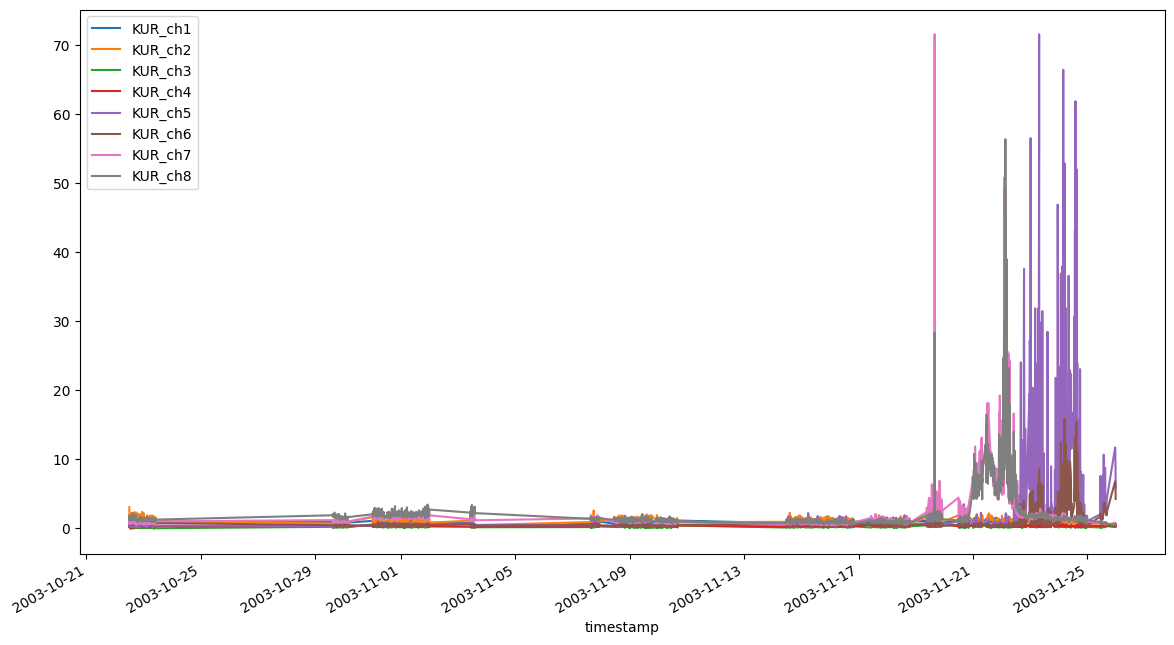

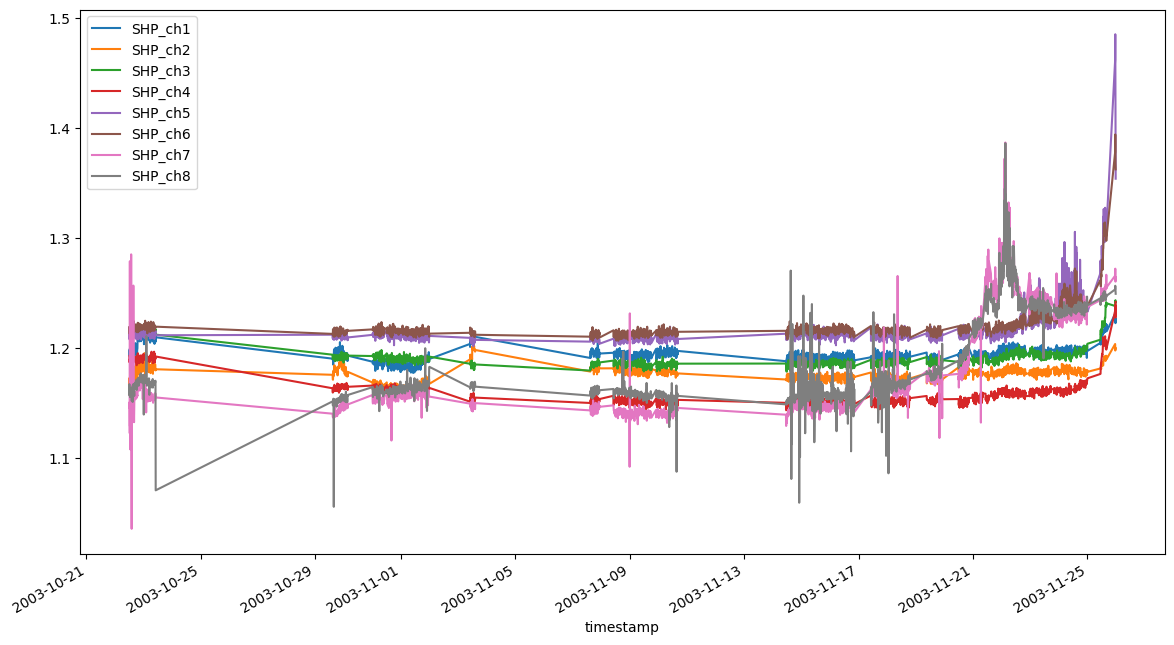

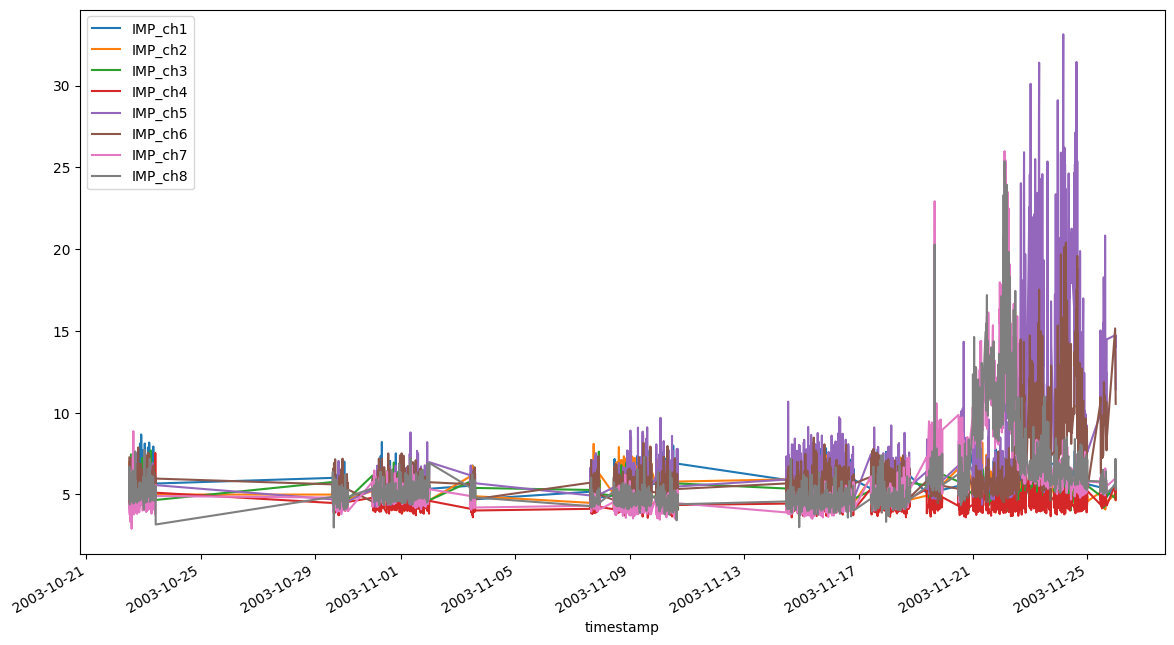

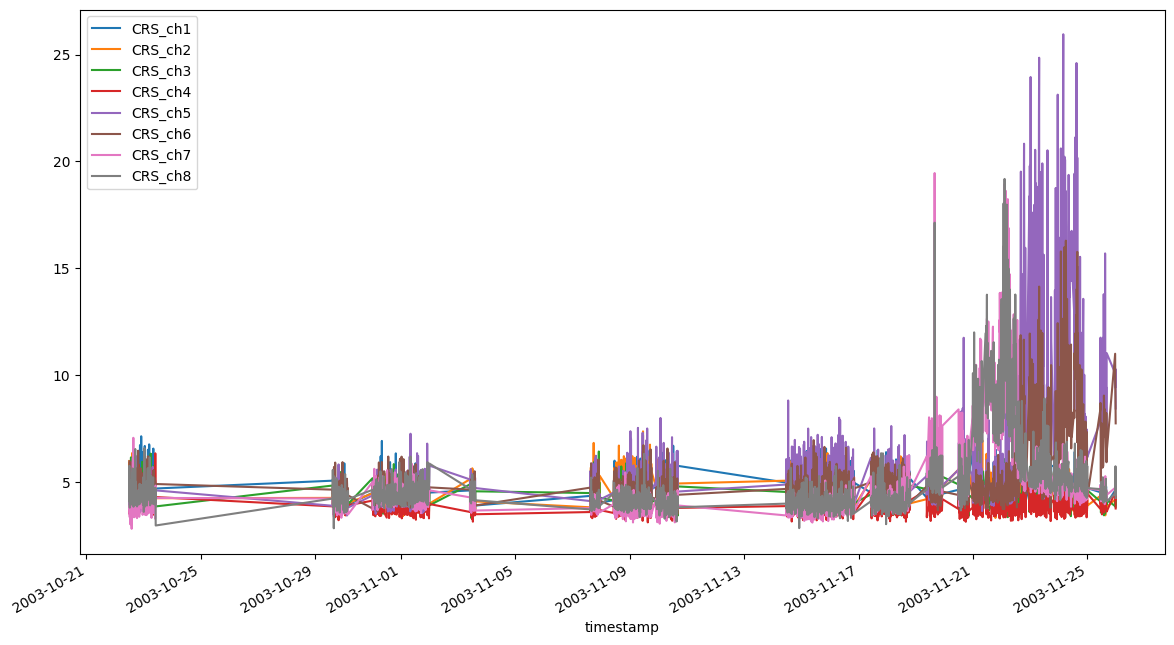

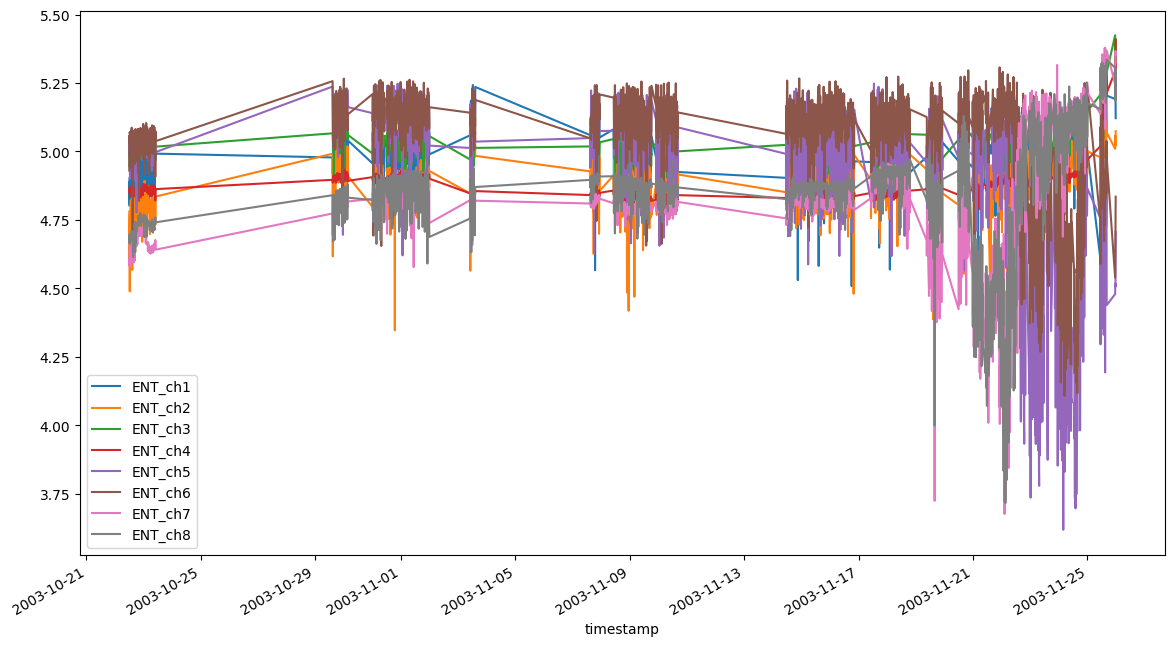

In [6]:
#plot df
c = ["ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

c = ["RMS_ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

c = ["KUR_ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

c = ["SHP_ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

c = ["IMP_ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

c = ["CRS_ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

c = ["ENT_ch{}".format(x+1) for x in range(8)]
df[c].plot(figsize=(14,8))

In [7]:
df2 = load_data('/Users/mariaelenagarciabaiz/Downloads/Capstone/2nd_test')
print(df2.head)

<bound method NDFrame.head of                           ch1       ch2       ch3       ch4   RMS_ch1  \
timestamp                                                               
2004-02-12 10:32:39  0.058332  0.071832  0.083244  0.043065  0.074179   
2004-02-12 10:42:39  0.058997  0.074008  0.084439  0.044540  0.075382   
2004-02-12 10:52:39  0.060239  0.074223  0.083922  0.044442  0.076230   
2004-02-12 11:02:39  0.061453  0.073843  0.084462  0.045081  0.078724   
2004-02-12 11:12:39  0.061361  0.075606  0.082837  0.045118  0.078474   
...                       ...       ...       ...       ...       ...   
2004-02-19 05:42:39  0.453318  0.161011  0.137444  0.119042  0.725001   
2004-02-19 05:52:39  0.337575  0.132397  0.144997  0.092123  0.462012   
2004-02-19 06:02:39  0.351094  0.152259  0.151296  0.100813  0.483835   
2004-02-19 06:12:39  0.001857  0.003731  0.003656  0.001786  0.002103   
2004-02-19 06:22:39  0.001168  0.000767  0.000716  0.001699  0.001533   

                    

<Axes: xlabel='timestamp'>

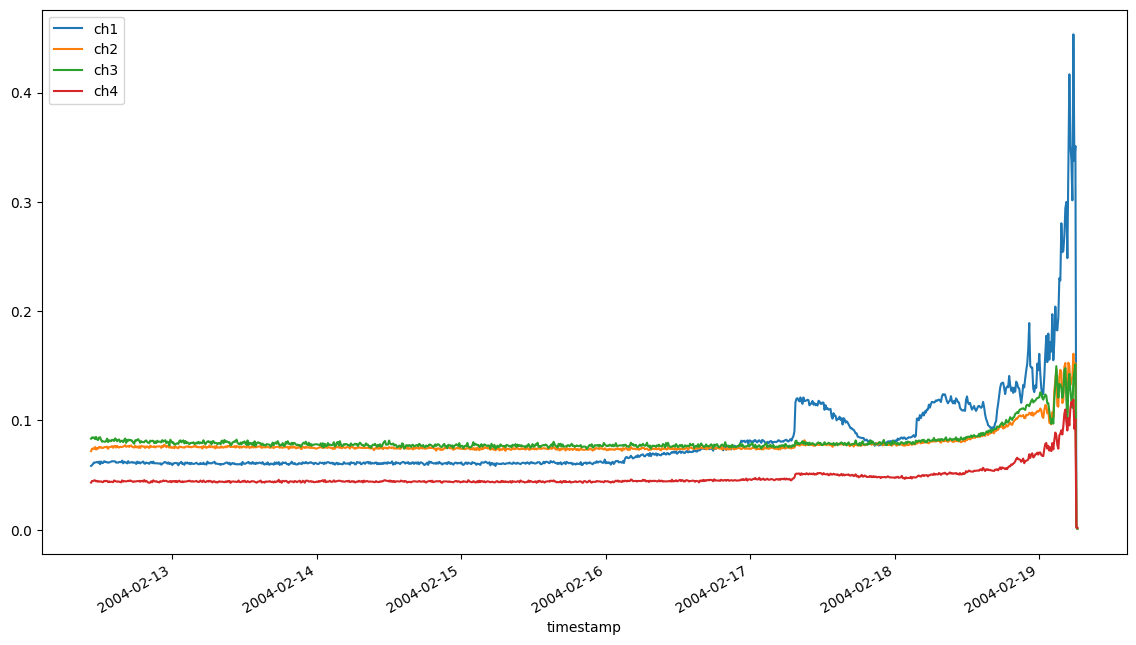

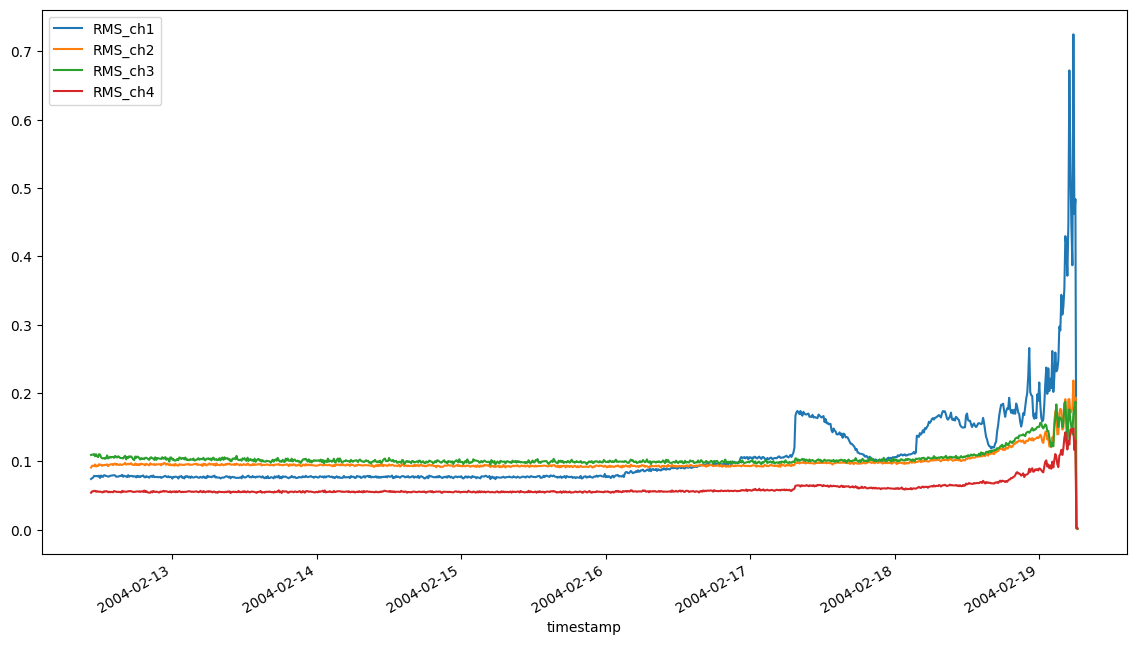

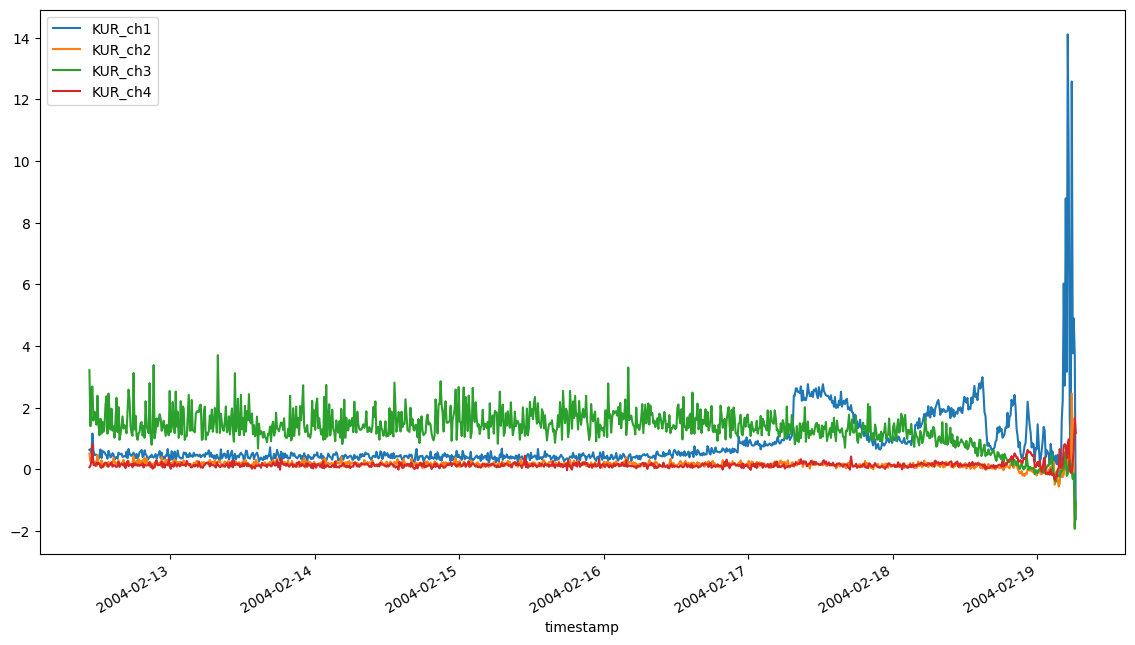

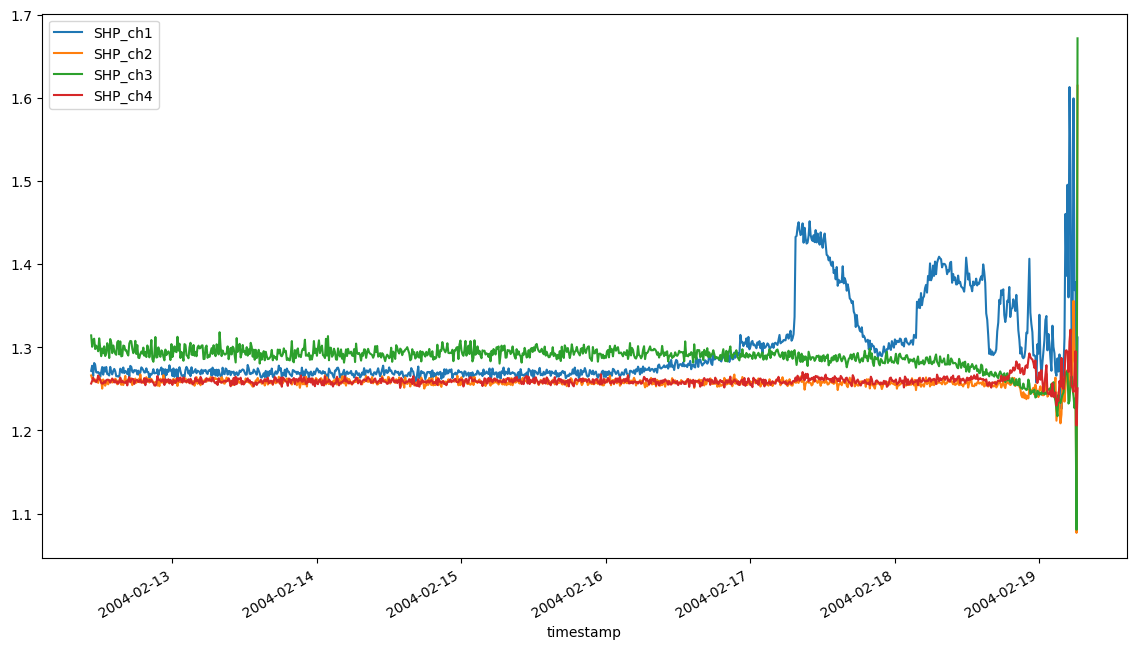

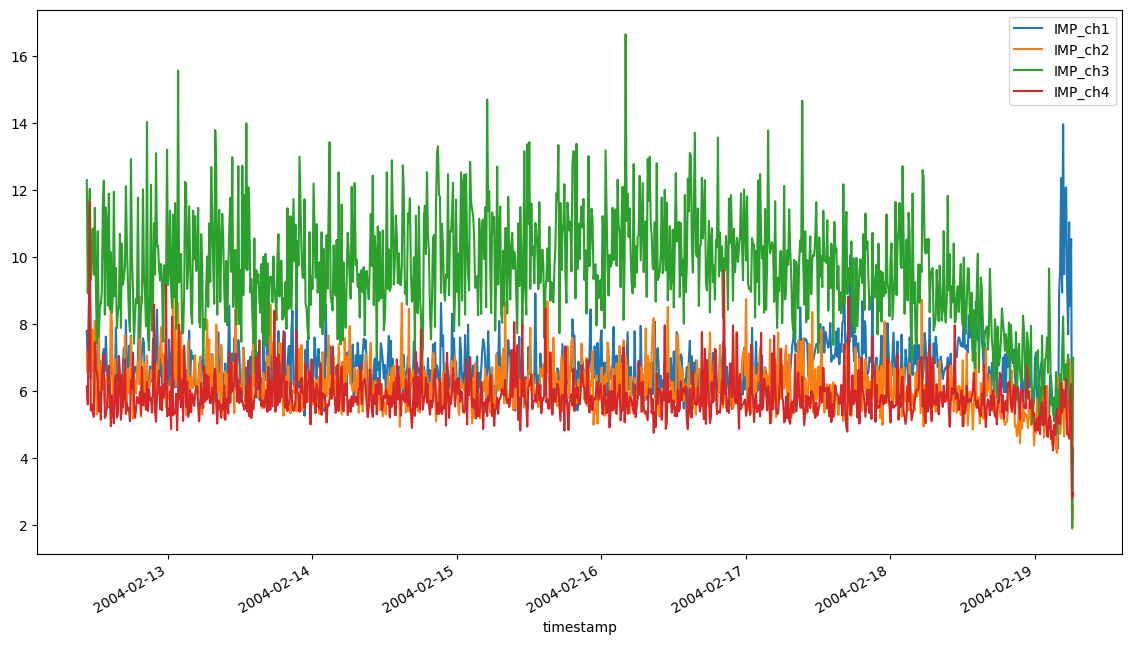

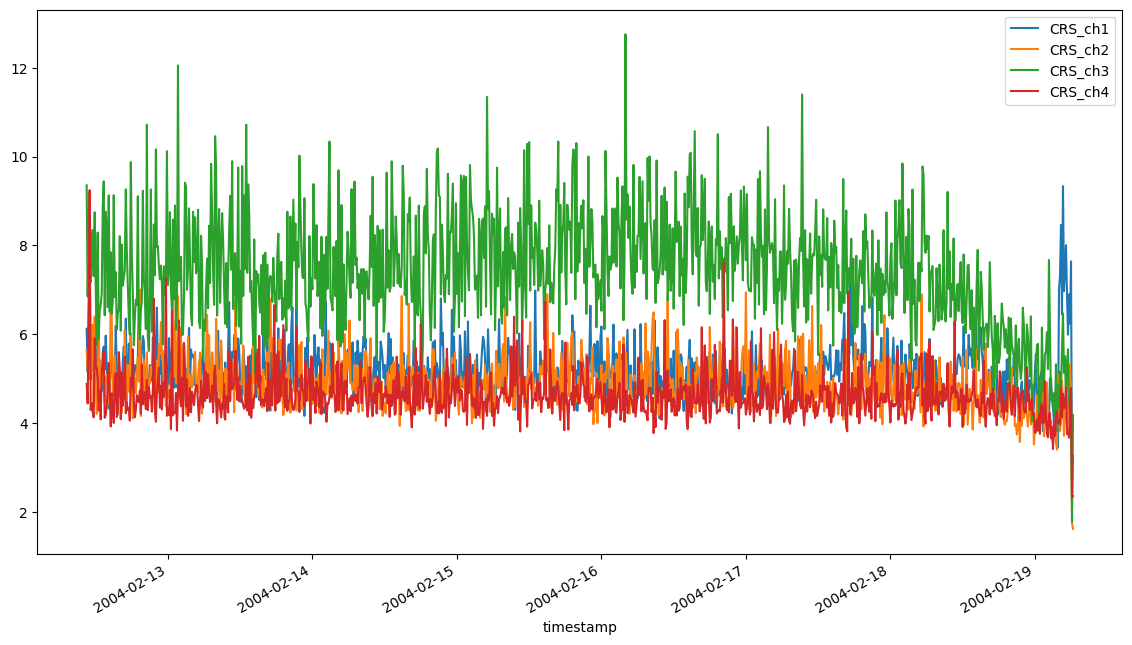

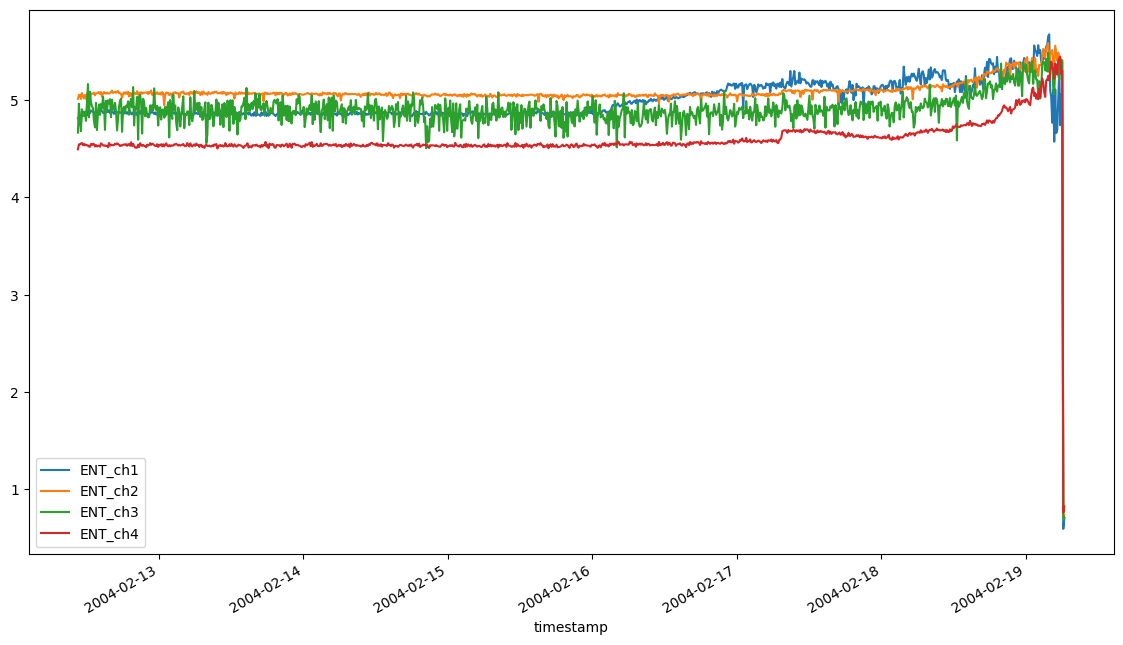

In [12]:
#plot df2
c = ["ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

c = ["RMS_ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

c = ["KUR_ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

c = ["SHP_ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

c = ["IMP_ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

c = ["CRS_ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

c = ["ENT_ch{}".format(x+1) for x in range(4)]
df2[c].plot(figsize=(14,8))

In [13]:
df3 = load_data('/Users/mariaelenagarciabaiz/Downloads/Capstone/3rd_test')
print(df3.head)

<bound method NDFrame.head of                           ch1       ch2       ch3       ch4   RMS_ch1  \
timestamp                                                               
2004-03-04 09:27:46  0.061629  0.075288  0.051990  0.043475  0.079768   
2004-03-04 09:32:46  0.060776  0.072208  0.052238  0.042038  0.078678   
2004-03-04 09:42:46  0.062192  0.072886  0.054810  0.041359  0.079815   
2004-03-04 09:52:46  0.062992  0.073434  0.054262  0.043128  0.081082   
2004-03-04 10:02:46  0.061945  0.073006  0.053243  0.042619  0.079165   
...                       ...       ...       ...       ...       ...   
2004-04-18 02:02:55  0.122481  0.188264  0.342760  0.195163  0.154785   
2004-04-18 02:12:55  0.110247  0.166032  0.331774  0.205829  0.137870   
2004-04-18 02:22:55  0.115788  0.201606  0.404300  0.222182  0.147181   
2004-04-18 02:32:55  0.119910  0.199326  0.543762  0.229032  0.154482   
2004-04-18 02:42:55  0.001533  0.002441  0.003663  0.001428  0.001912   

                    

<Axes: xlabel='timestamp'>

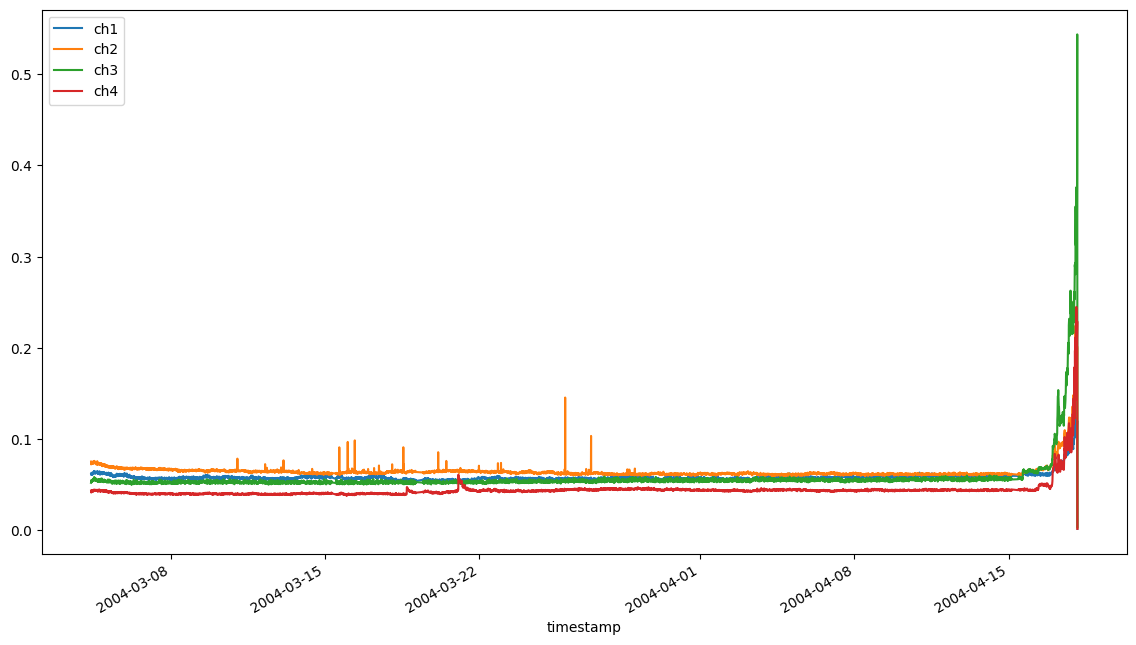

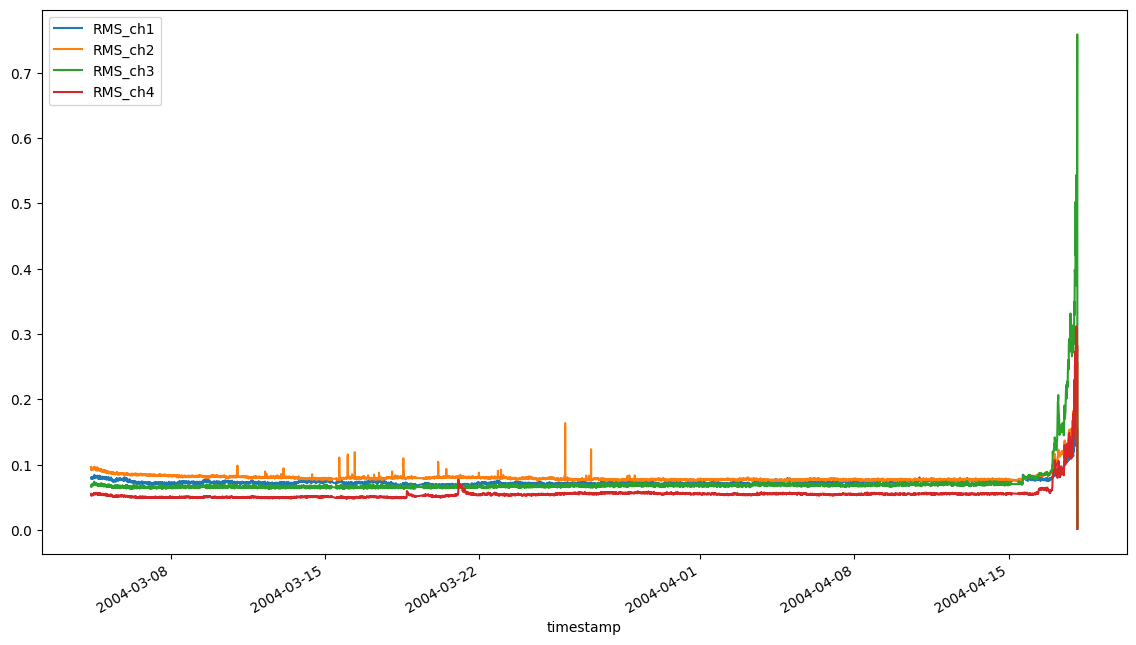

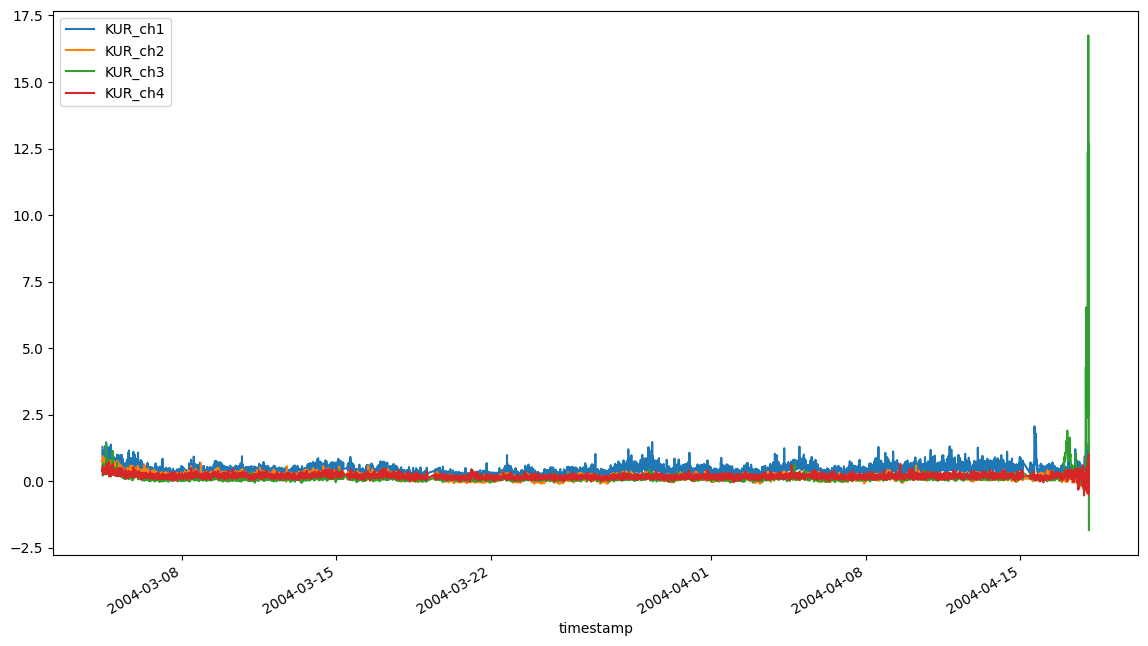

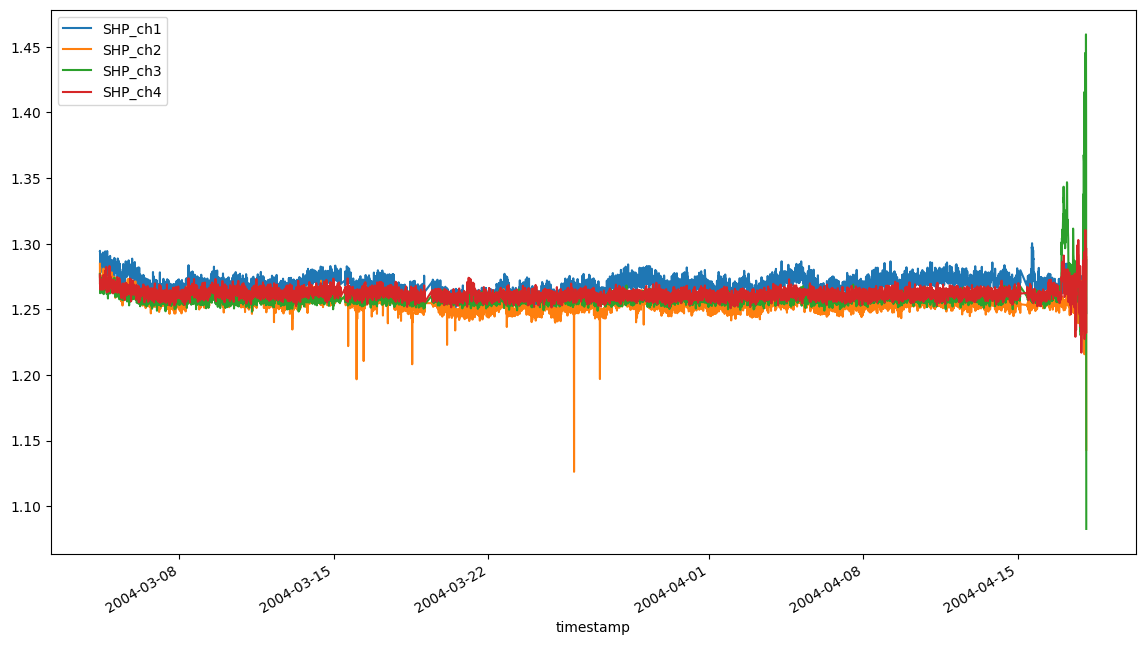

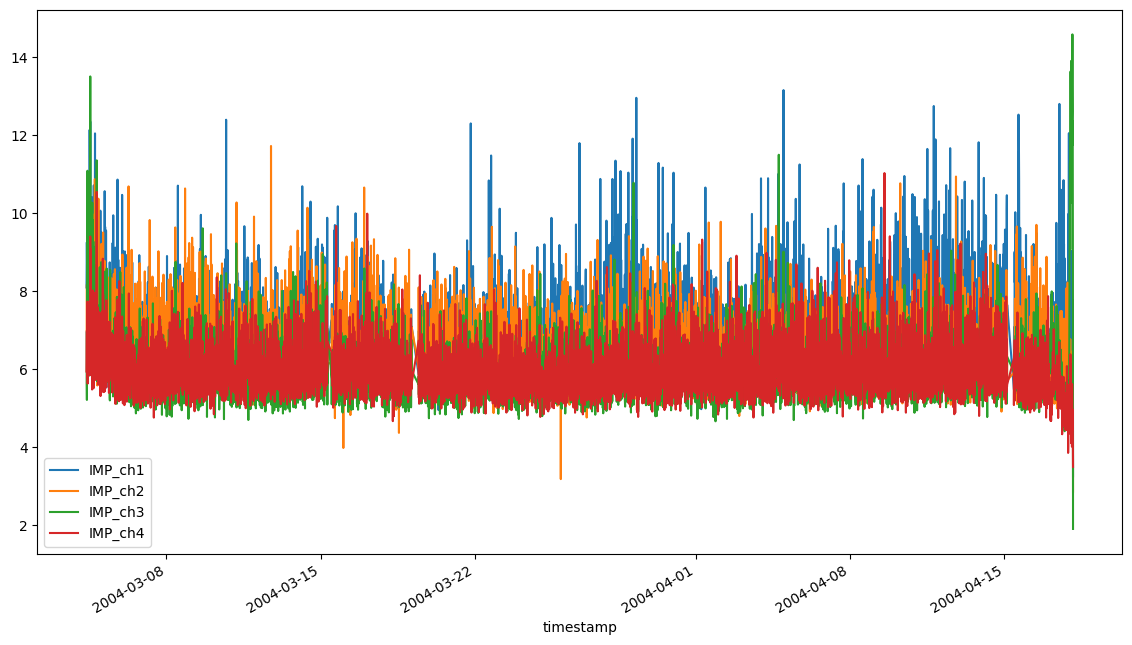

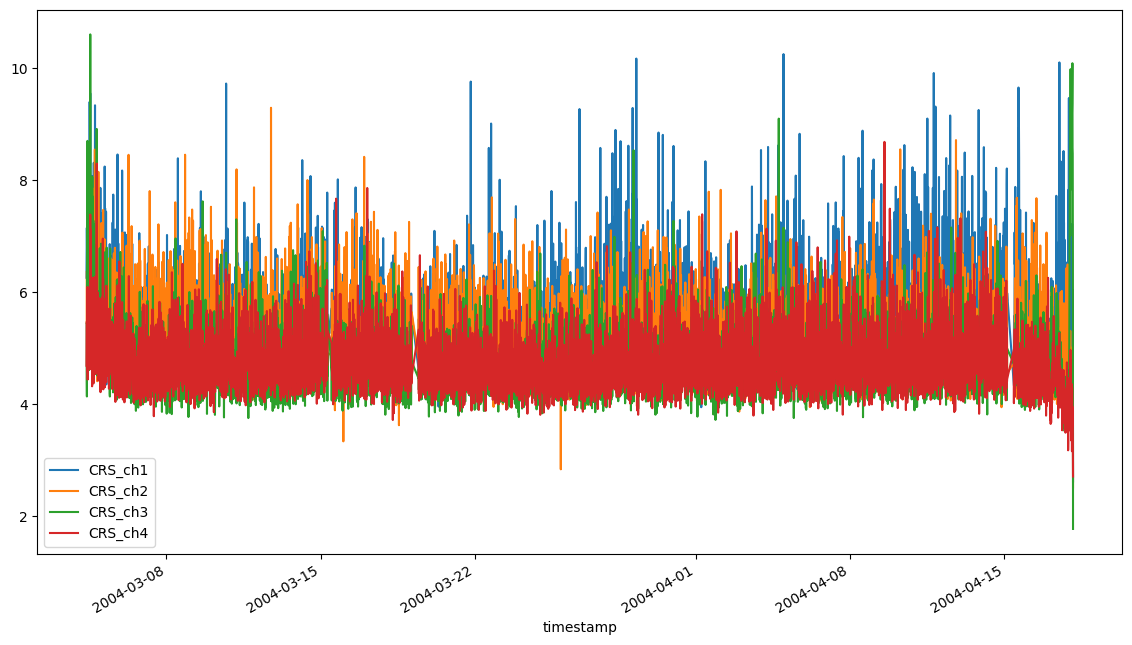

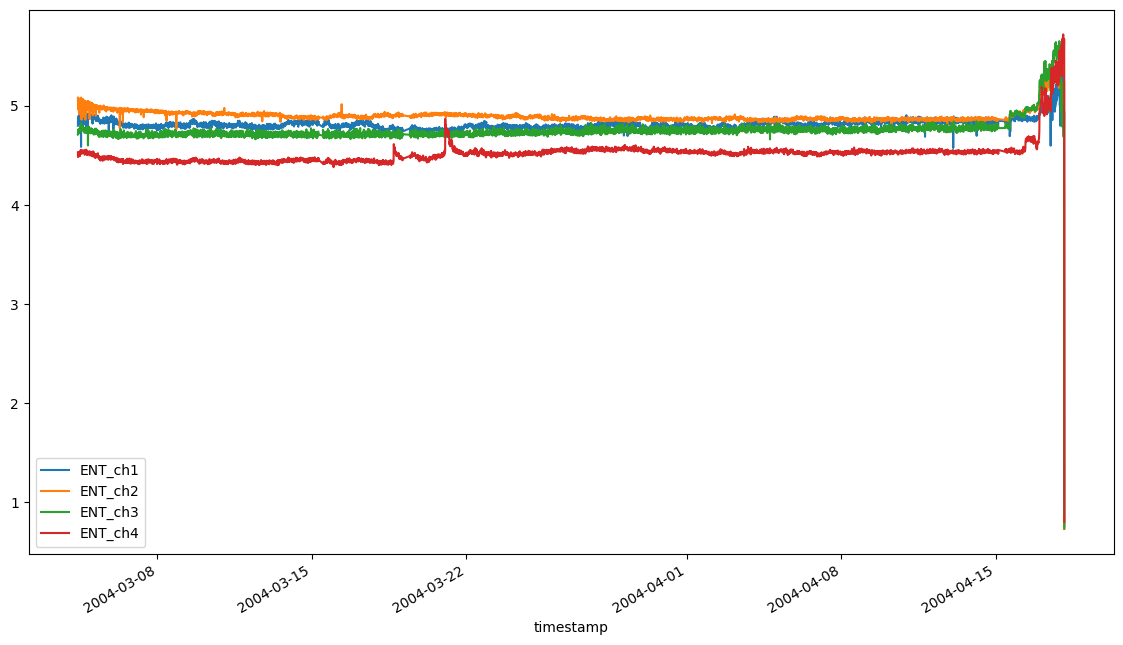

In [14]:
#plot df3
c = ["ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))

c = ["RMS_ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))

c = ["KUR_ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))

c = ["SHP_ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))

c = ["IMP_ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))

c = ["CRS_ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))

c = ["ENT_ch{}".format(x+1) for x in range(4)]
df3[c].plot(figsize=(14,8))